In [1]:
import numpy as np
import pandas as pd
from wrangle import wrangle_zillow
from wrangle import tts_con
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from prepare import remove_outliers

In [2]:
zillow= wrangle_zillow()

In [3]:
zillow_f, fences= remove_outliers(zillow)

fips_code column ignored


In [4]:
fences

bedroom_count  bathroom_count  calc_finished_square_ft  \
upper_fence            5.5             4.5                   3633.0   
lower_fence            1.5             0.5                   -167.0   

             tax_value_dollar_count  year_built  tax_amount  
upper_fence               1052766.0      2016.5    12218.55  
lower_fence               -328994.0      1908.5    -3265.77

In [5]:
zillow_f.head()

bedroom_count  bathroom_count  calc_finished_square_ft  \
0            4.0             2.0                   3633.0   
1            3.0             4.0                   1620.0   
2            3.0             2.0                   2077.0   
6            3.0             1.0                   1244.0   
7            3.0             2.0                   1300.0   

   tax_value_dollar_count  year_built  tax_amount  fips_code  
0                296425.0      2005.0     6941.39     6037.0  
1                847770.0      2011.0    10244.94     6037.0  
2                646760.0      1926.0     7924.68     6037.0  
6                169471.0      1950.0     2532.88     6037.0  
7                233266.0      1950.0     3110.99     6037.0

In [6]:
#Make sure to perform a train, validate, test split before and use only your train 
#dataset to explore the relationships between independent variables with other 
#independent variables or independent variables with your target variable.

ztrain, zval, ztest = tts_con(zillow_f)

In [30]:
#Write a function named plot_variable_pairs that accepts a dataframe as input and 
#plots all of the pairwise relationships along with the regression line for each pair.

def plot_variable_pairs(df):
    df2=df.sample(5000)
    for col in df2:
        for f in df2:
            sns.lmplot(data=df2, 
                       x=col, 
                       y= f, 
                       palette= 'Blues', 
                       line_kws={'color': 'red'},
                       markers='.')
            plt.title(f'{col} and {f} relationship')
            plt.show()
            

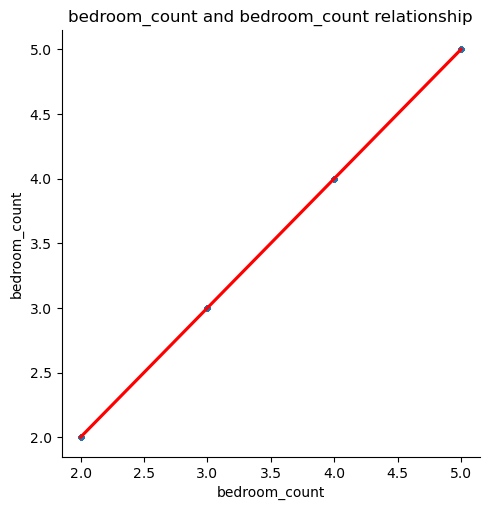

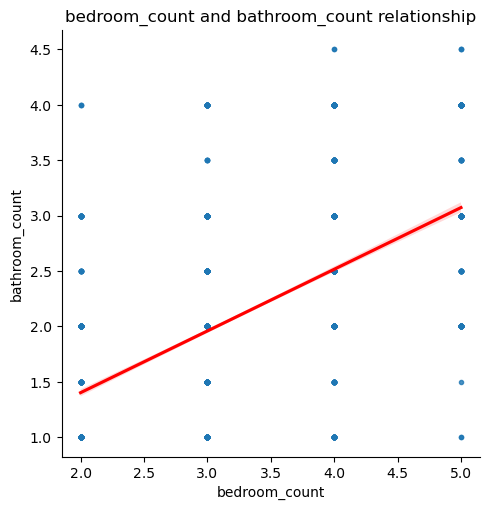

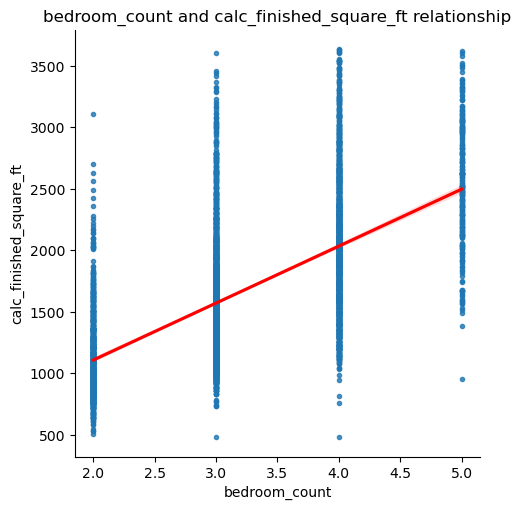

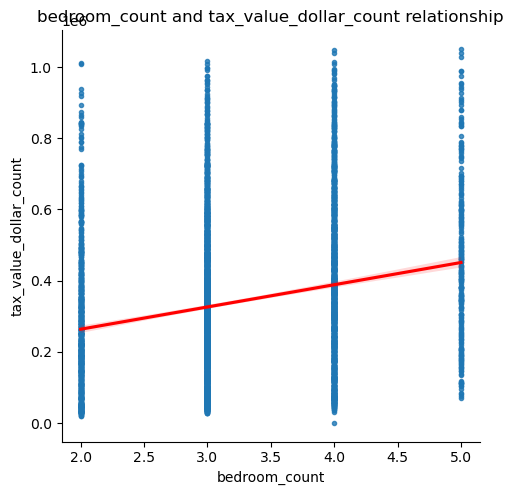

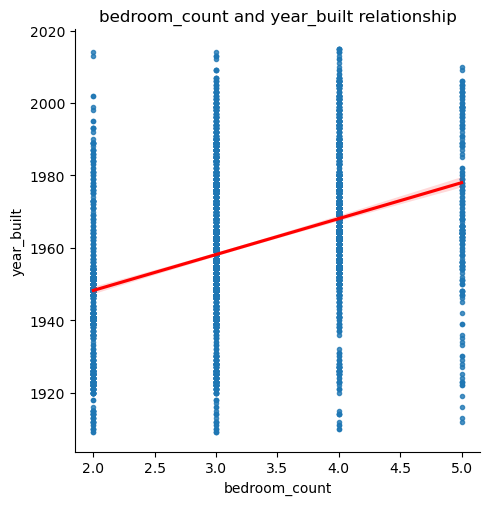

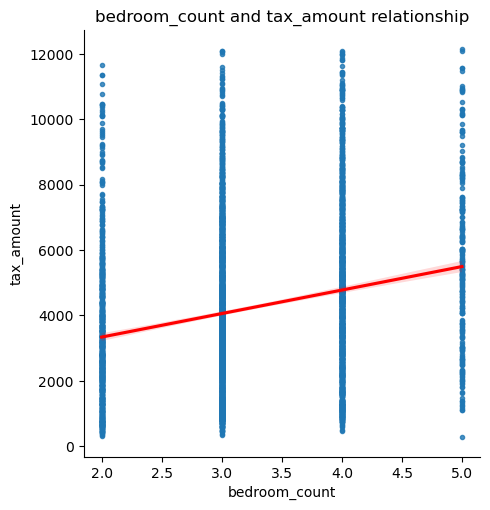

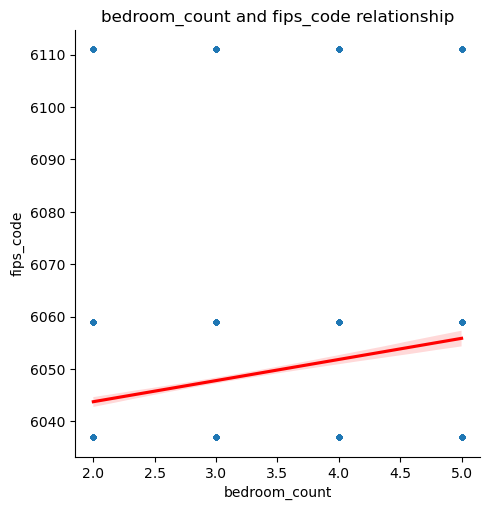

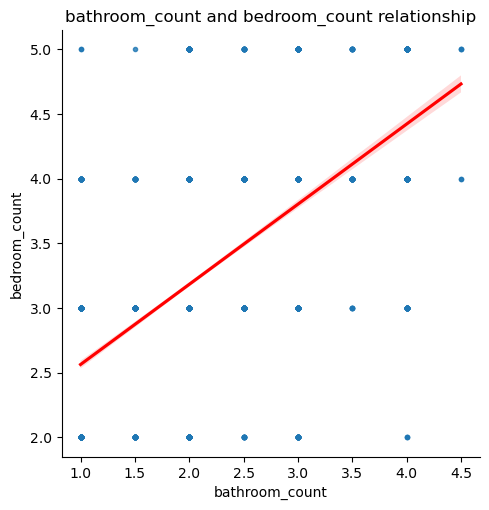

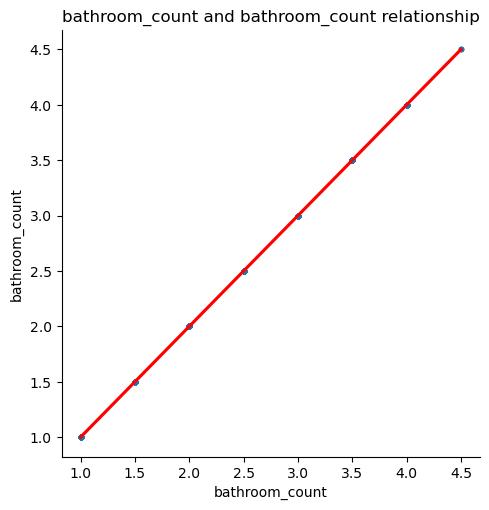

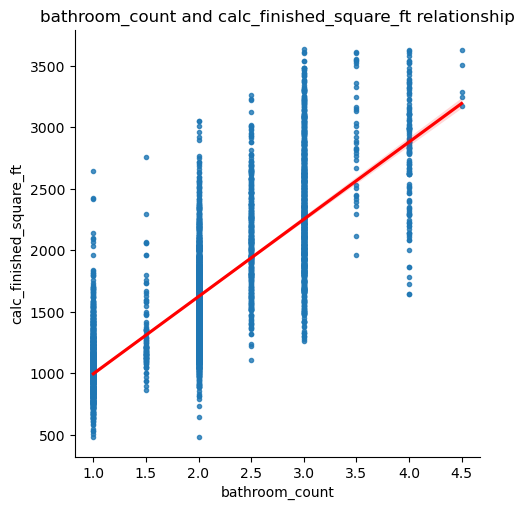

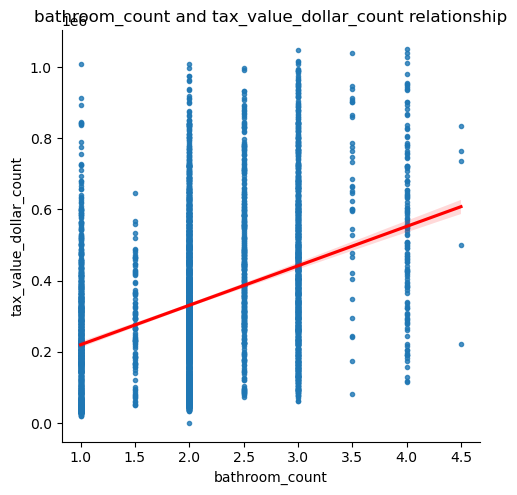

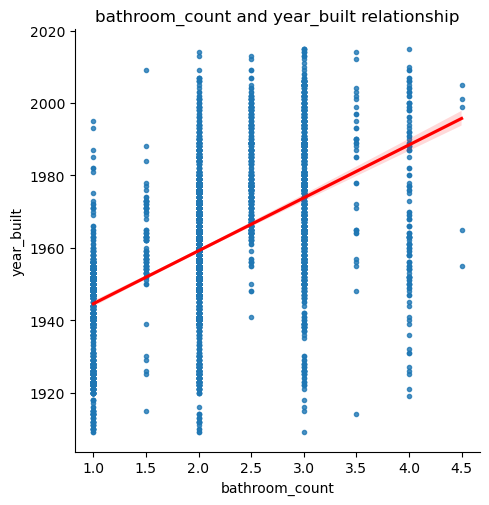

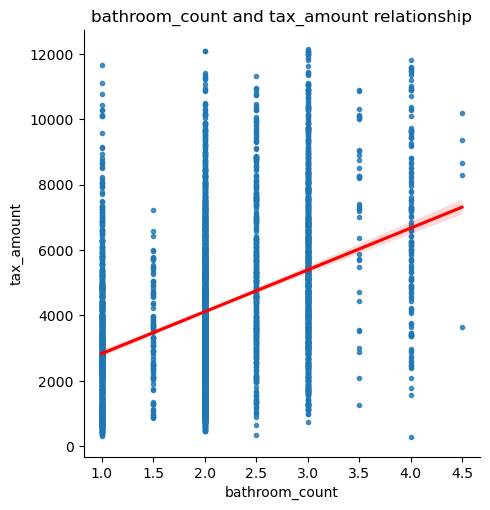

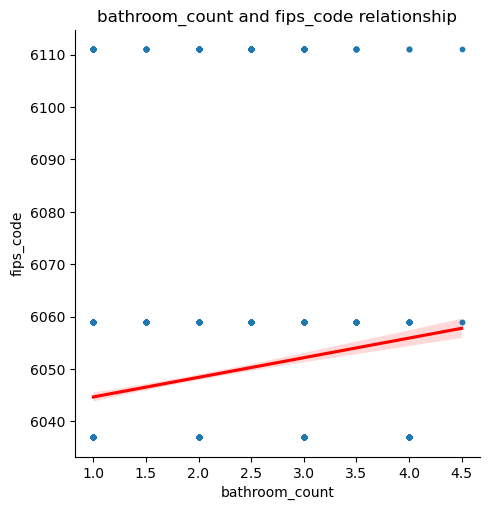

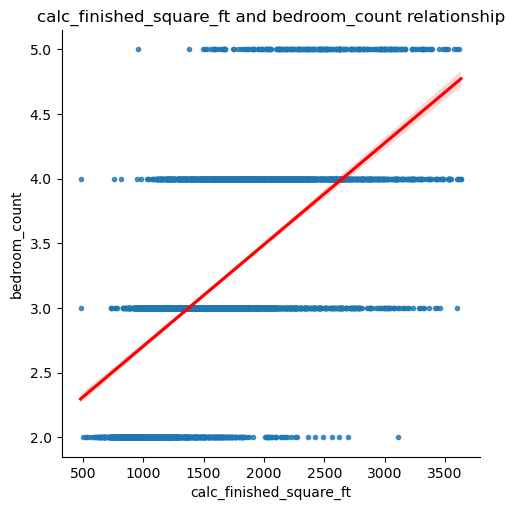

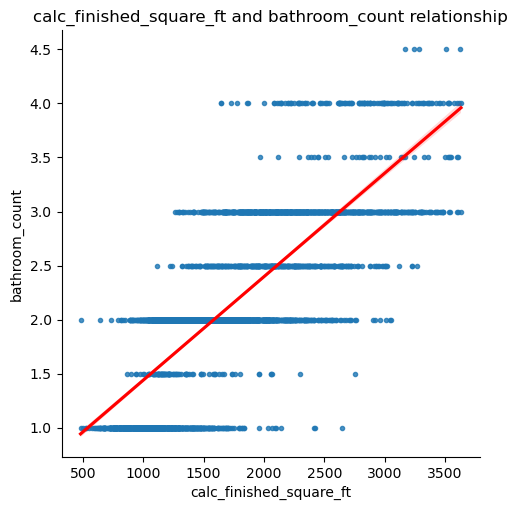

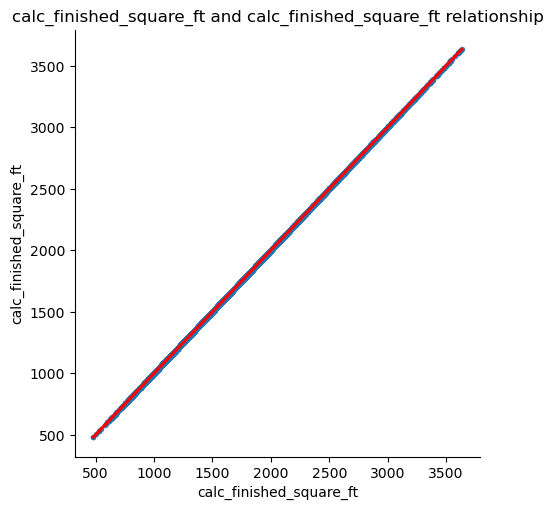

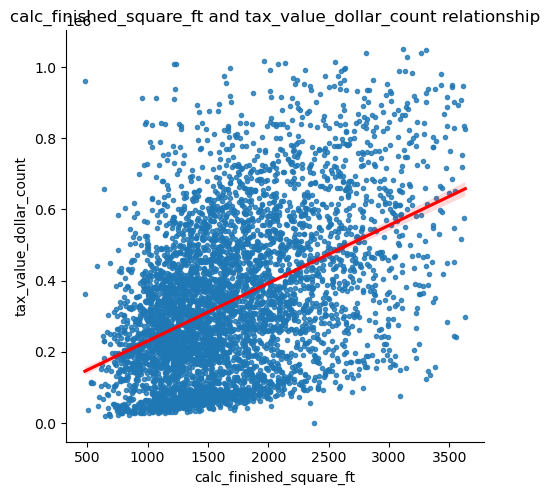

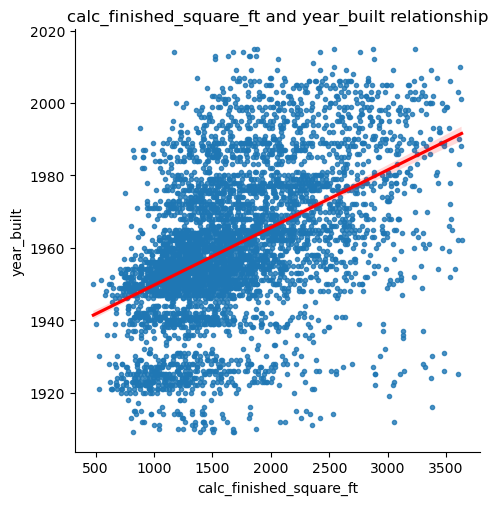

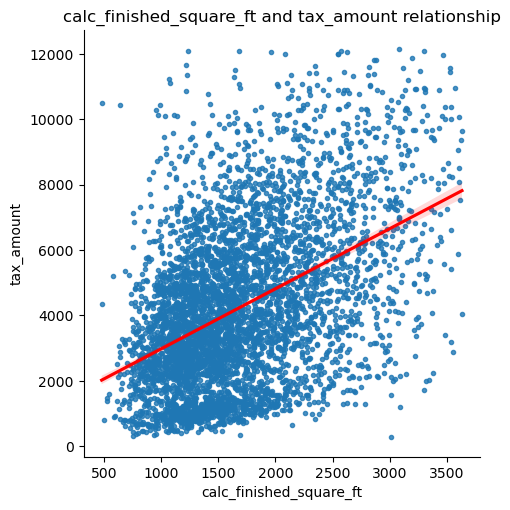

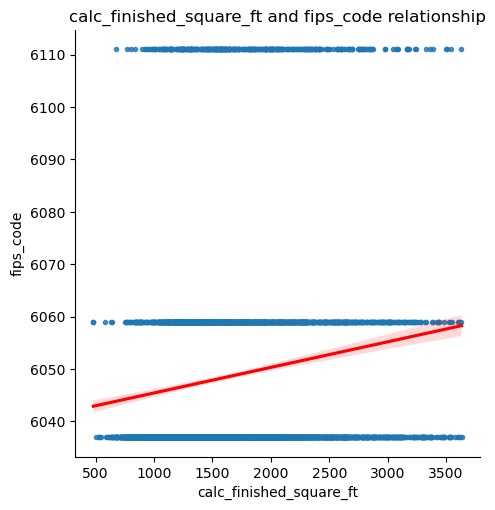

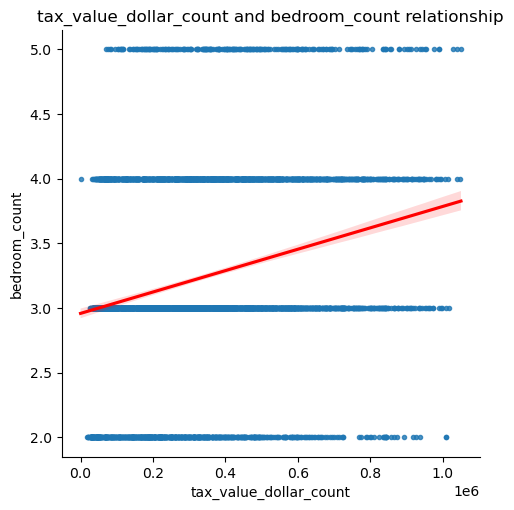

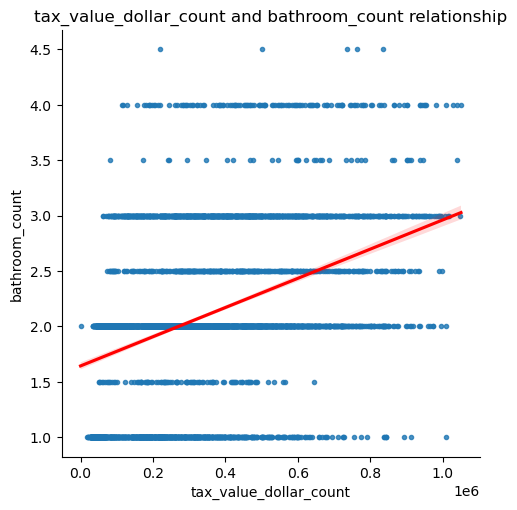

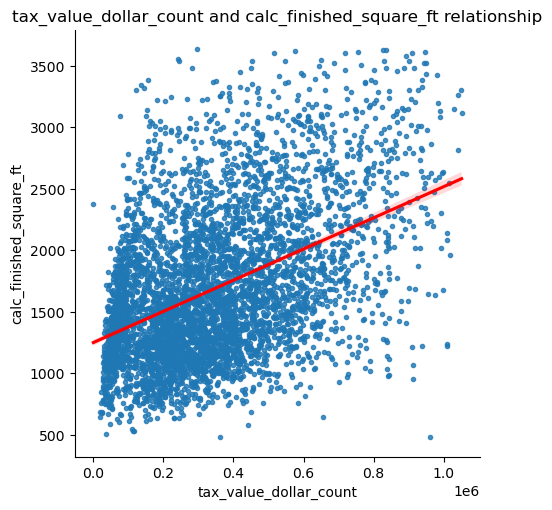

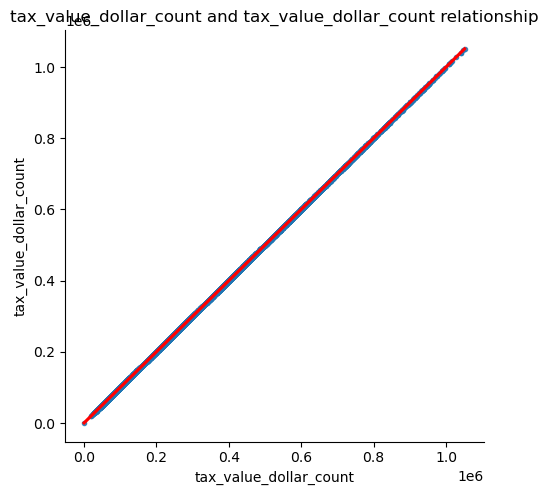

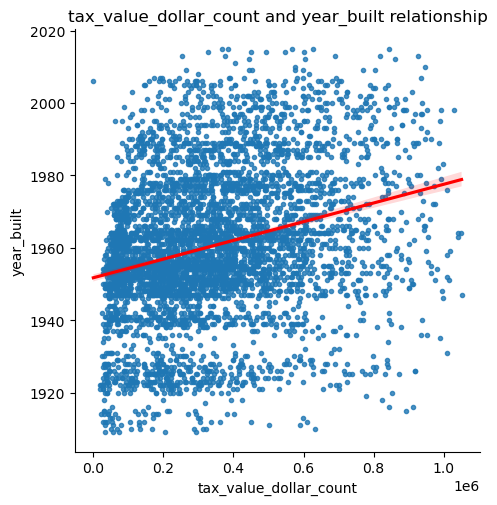

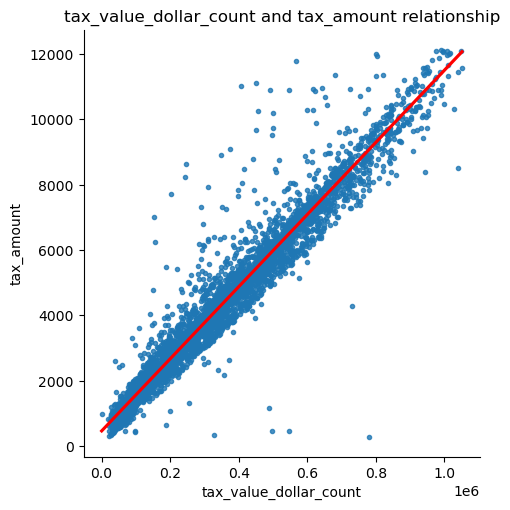

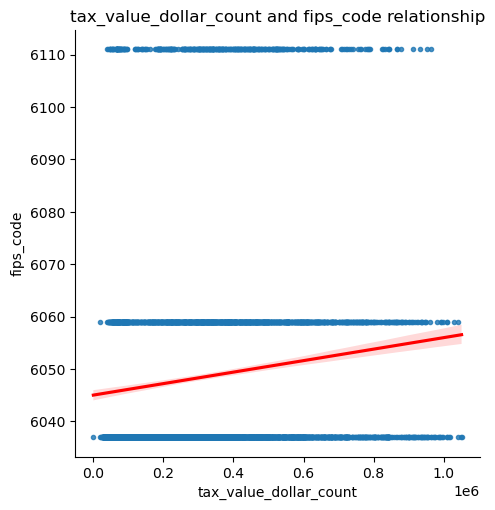

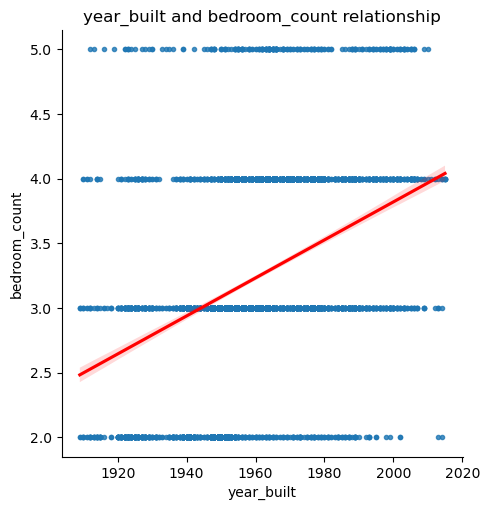

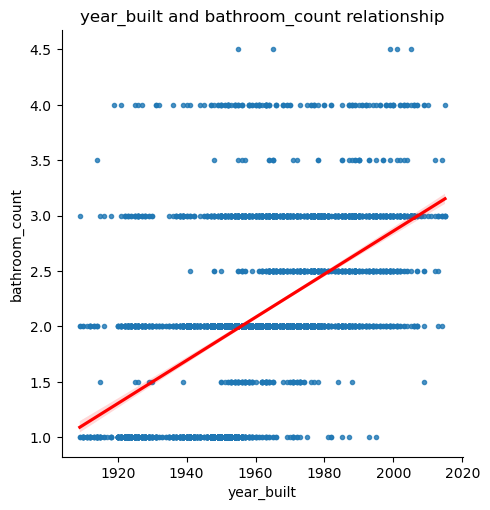

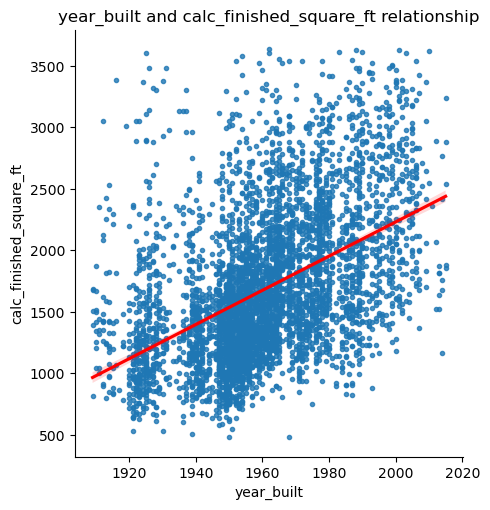

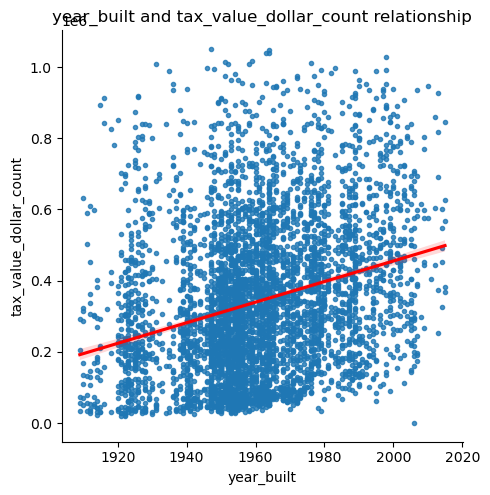

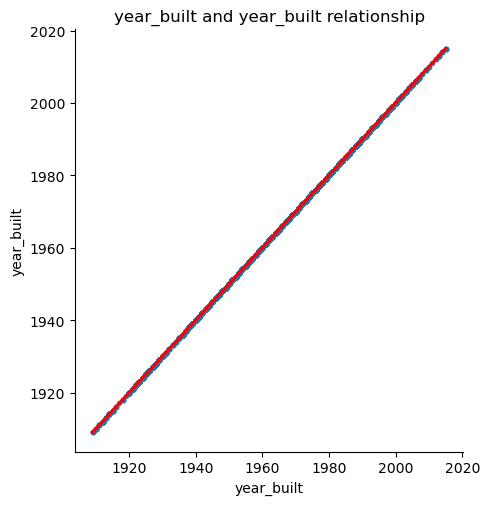

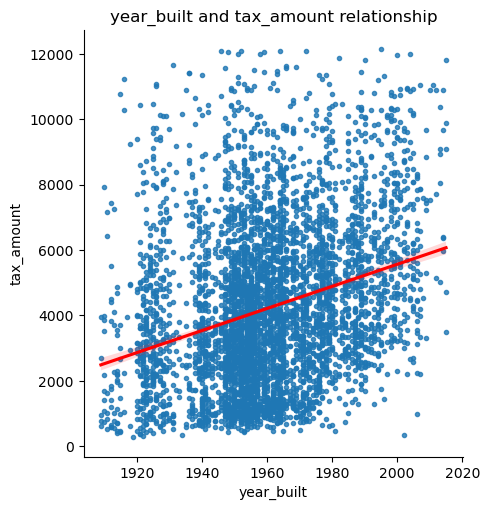

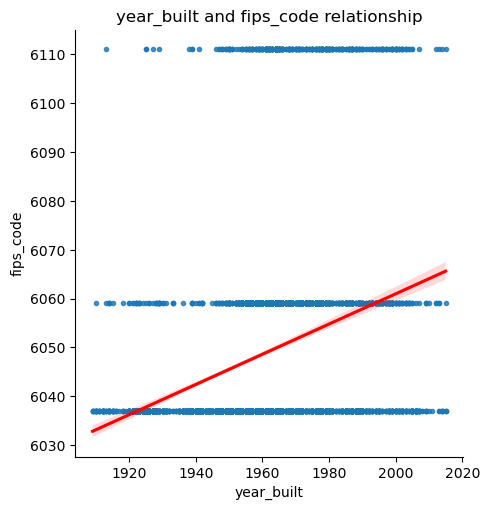

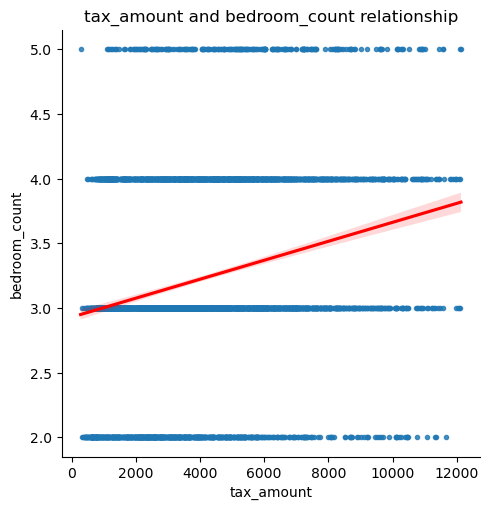

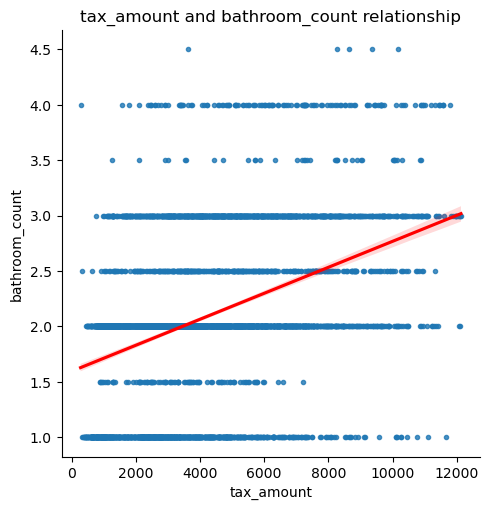

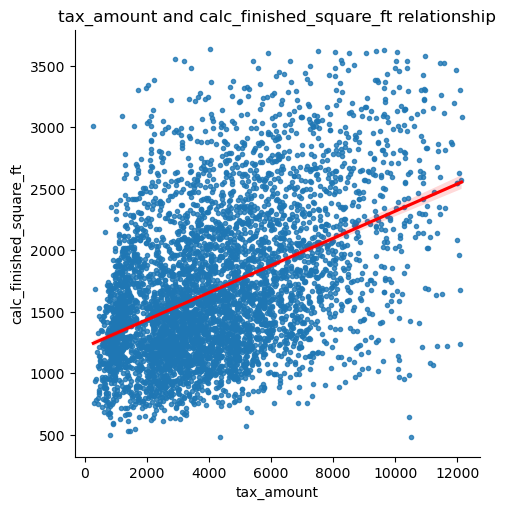

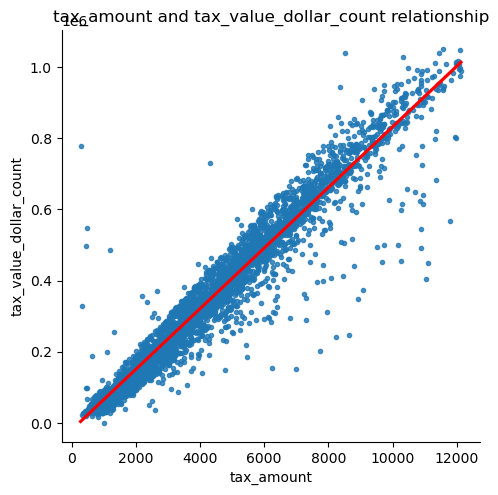

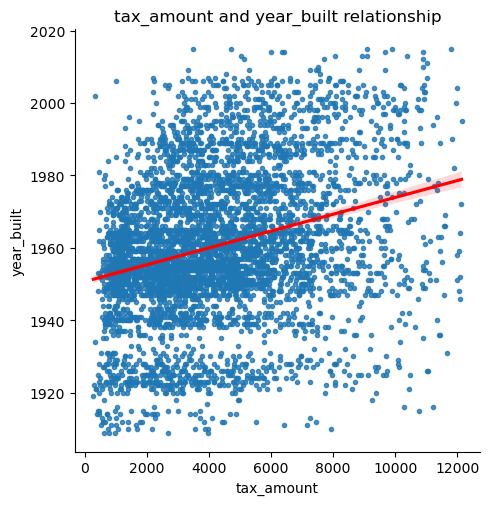

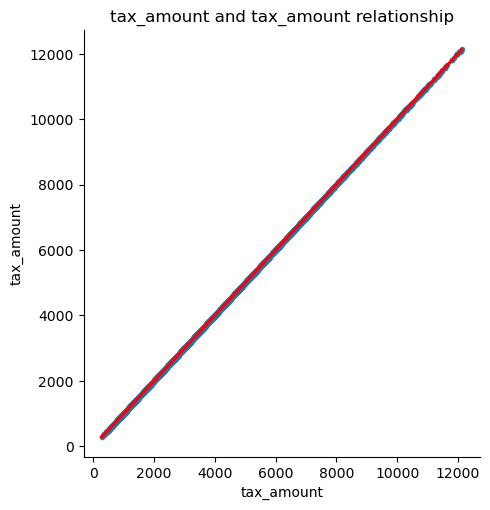

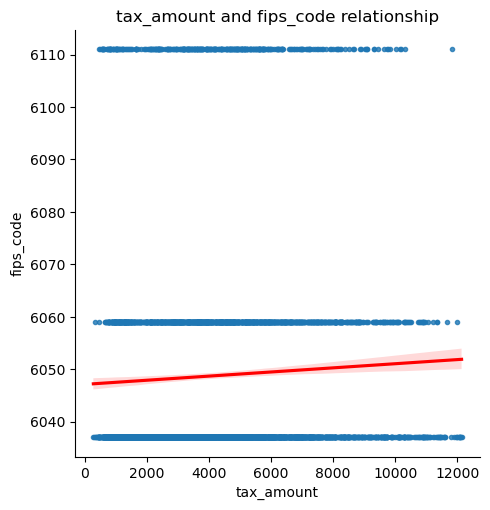

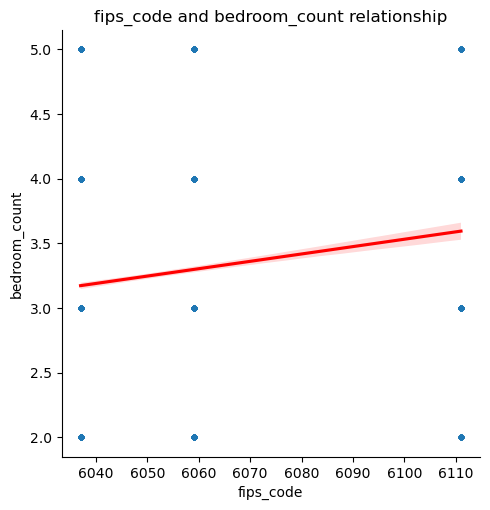

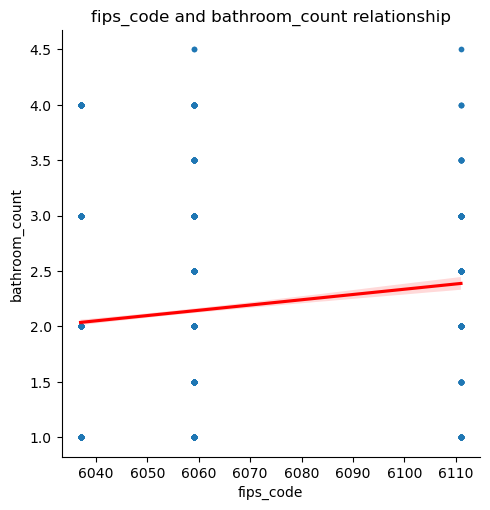

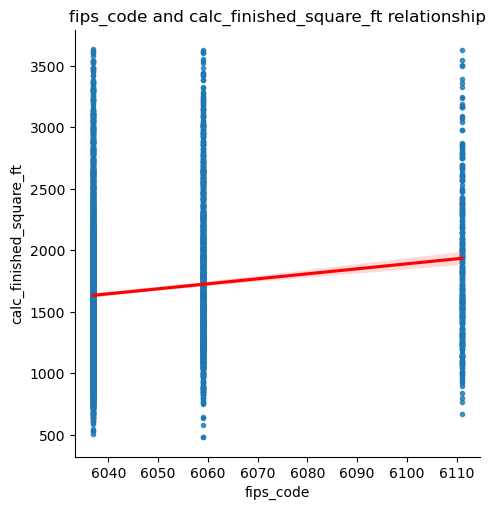

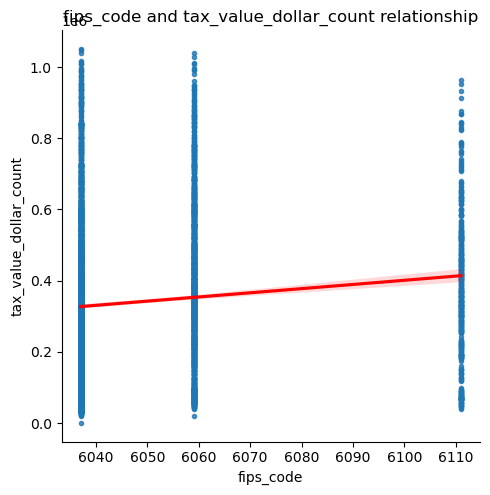

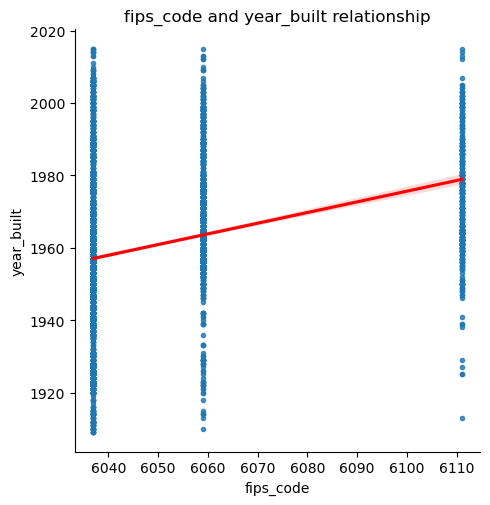

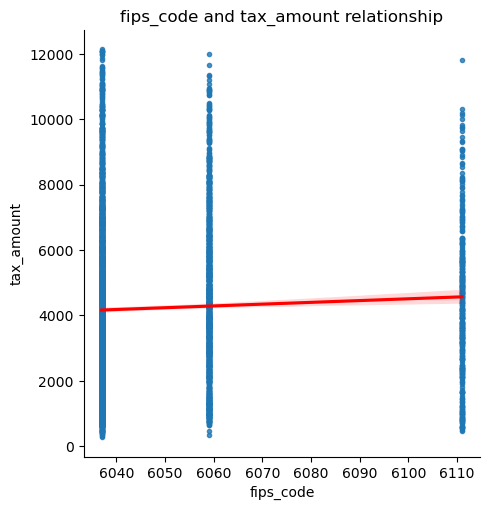

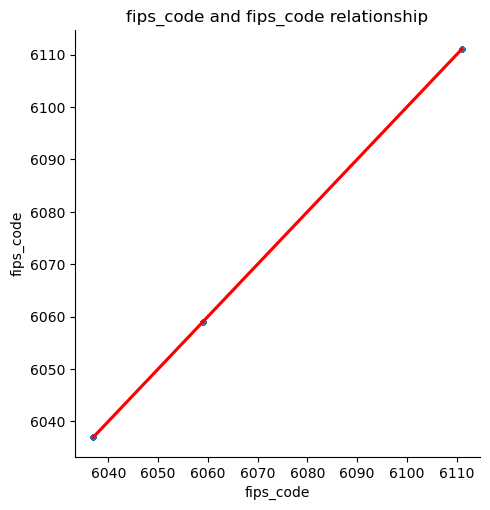

In [32]:
plot_variable_pairs(ztrain)

In [33]:
con_vars=ztrain.drop(labels=['fips_code', 'bathroom_count', 'bedroom_count'], axis =1)

In [34]:
con_vars

calc_finished_square_ft  tax_value_dollar_count  year_built  \
1997521                   1174.0                235927.0      1954.0   
405332                    2202.0                565923.0      1966.0   
1161201                   1725.0                460000.0      1959.0   
307011                    2228.0                140260.0      1976.0   
18179                     1679.0                454548.0      1940.0   
...                          ...                     ...         ...   
188307                     675.0                232683.0      1951.0   
515366                    2063.0                527000.0      1985.0   
451411                    1153.0                 59180.0      1953.0   
1688912                   1354.0                270970.0      1955.0   
1295309                   2628.0                247726.0      2006.0   

         tax_amount  
1997521     2926.88  
405332      6213.46  
1161201     5426.41  
307011      2020.13  
18179       5419.54  
...             ...  
188307      3023.64  
515366      6487.83  
451411       766.86  
1688912     3481.12  
1295309     3954.61  

[1060438 rows x 4 columns]

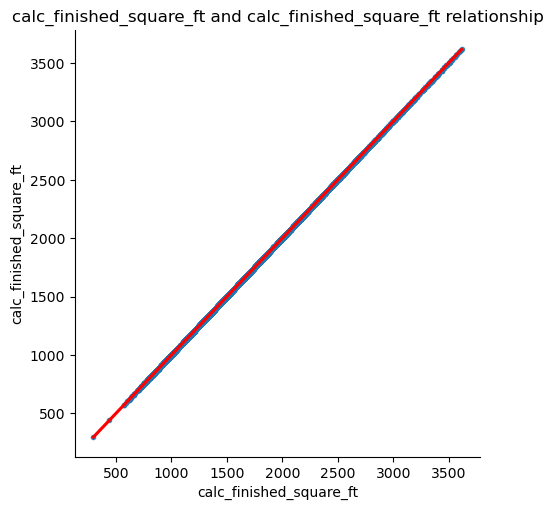

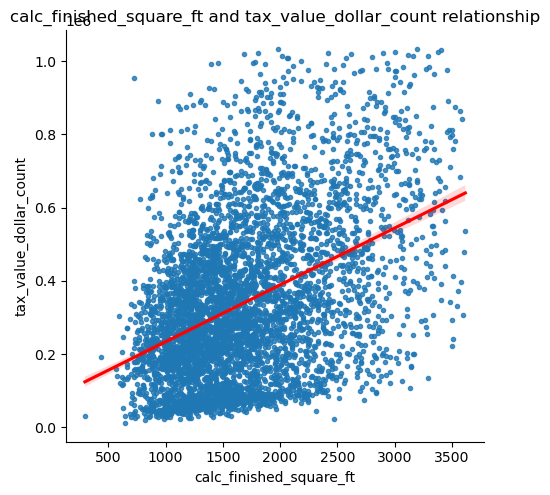

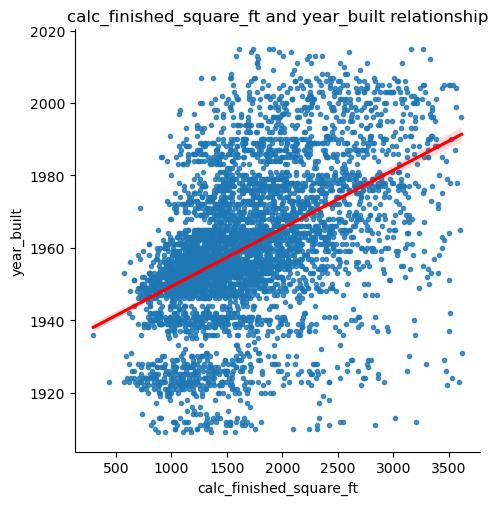

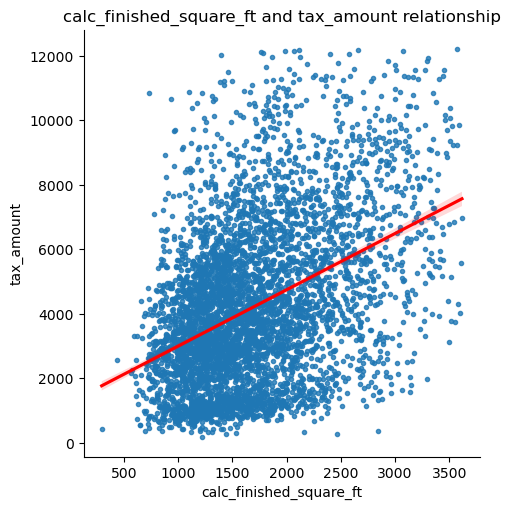

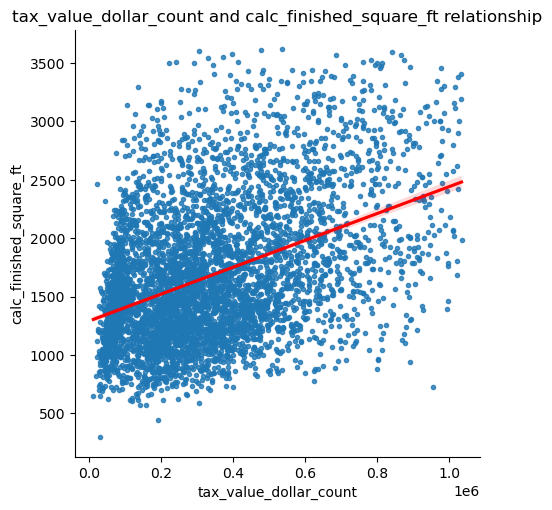

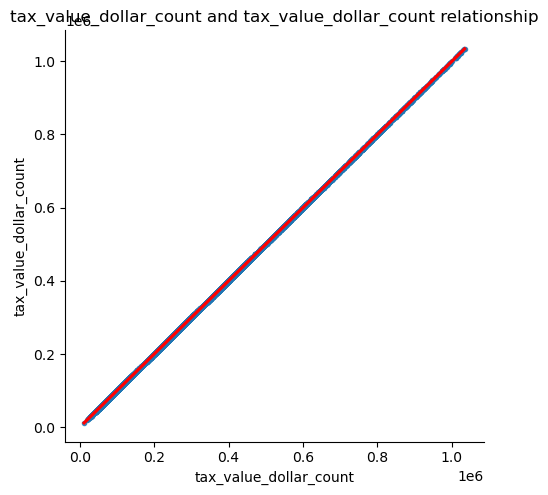

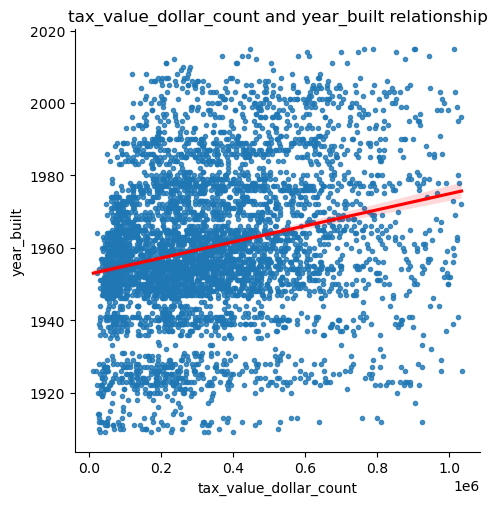

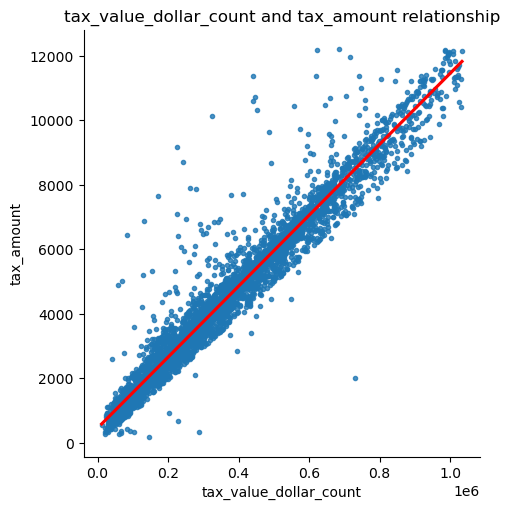

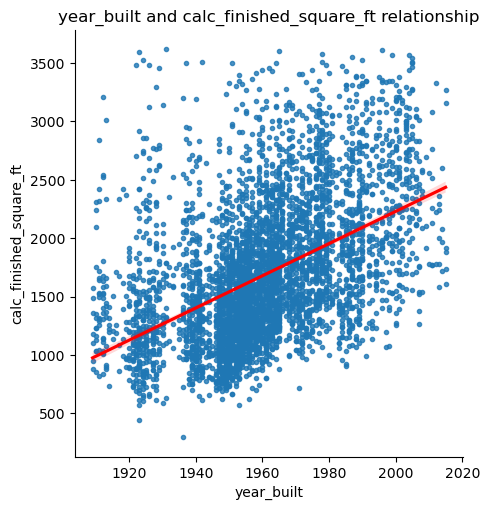

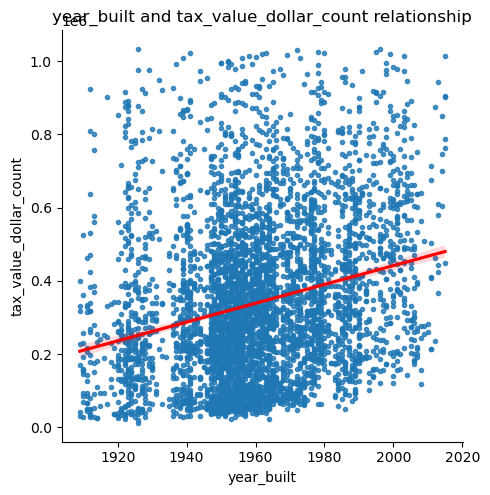

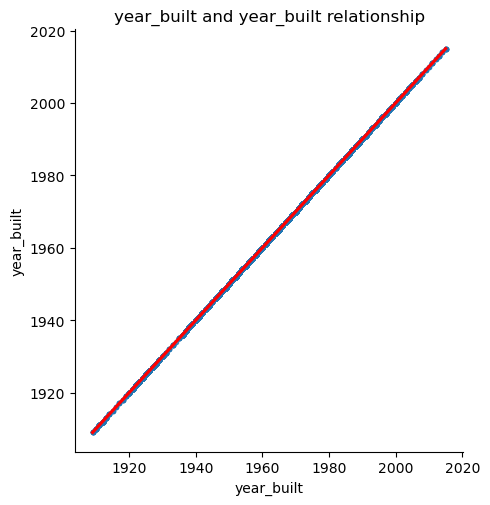

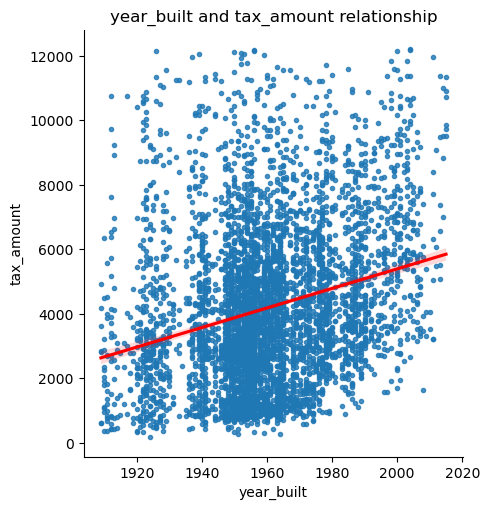

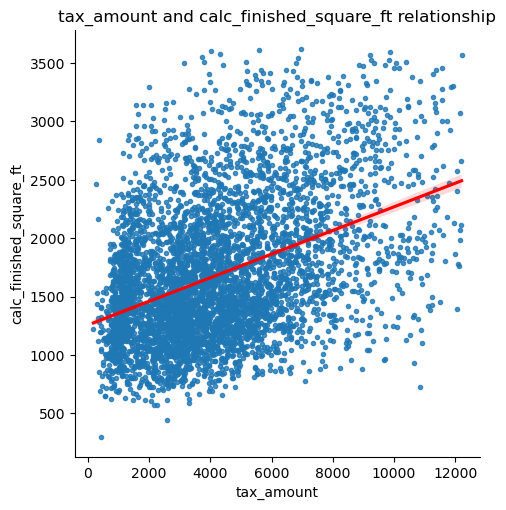

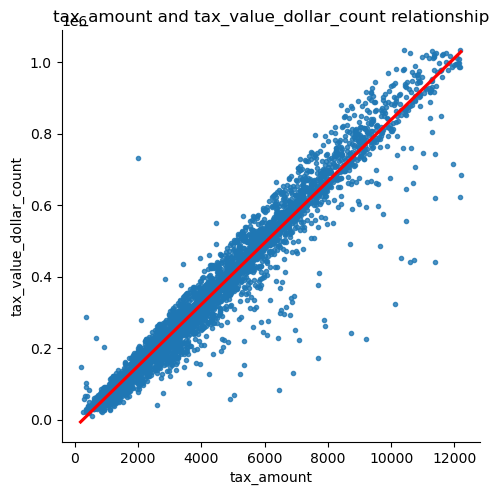

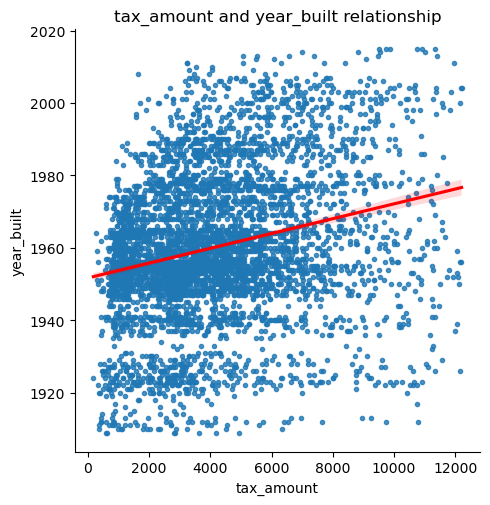

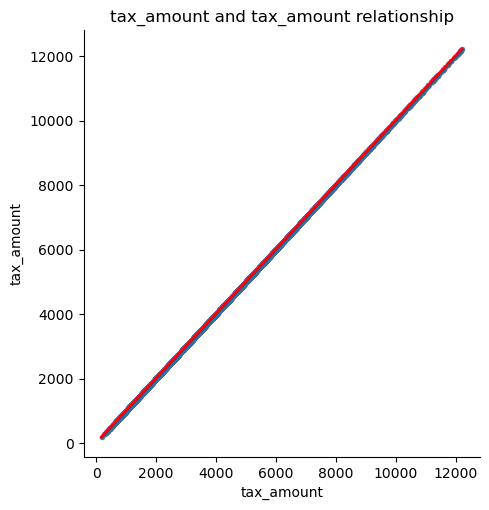

In [35]:
plot_variable_pairs(con_vars)

In [90]:
#Write a function named plot_categorical_and_continuous_vars that accepts 
#your dataframe and the name of the columns that hold the continuous and categorical 
#features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

def plot_categorical_and_continuous_vars(df, tar, cat):
    sns.swarmplot(x=cat.sample(5000), y=tar.sample(5000), data=df)
    plt.show()
    sns.barplot(x=cat.sample(5000), y=tar.sample(5000), data=df)
    plt.show()
    sns.boxplot(x=cat.sample(5000), y=tar.sample(5000), data=df)
    plt.show()

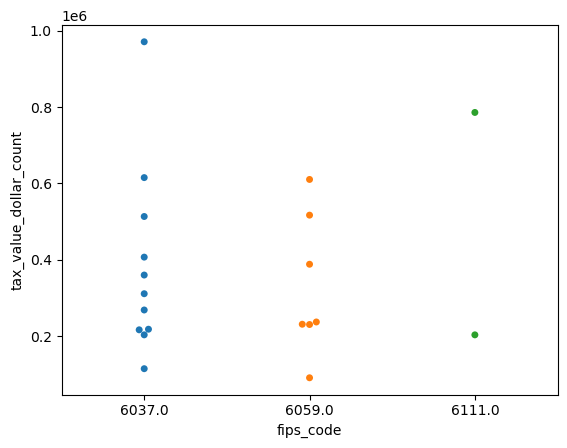

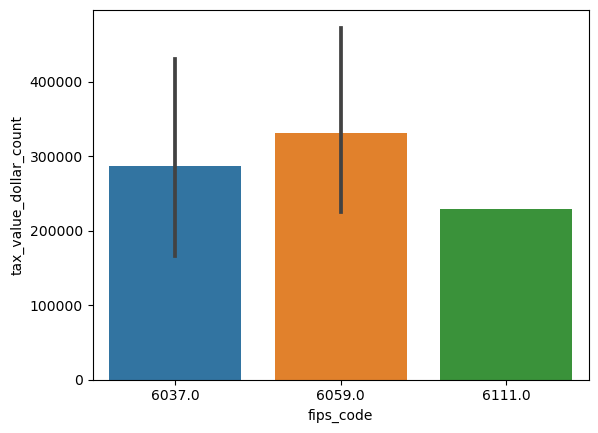

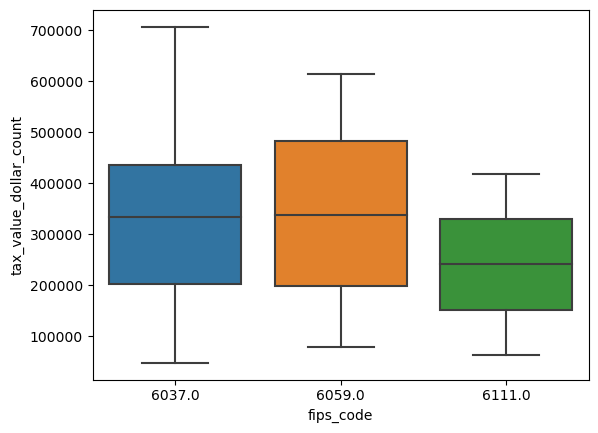

In [91]:
plot_categorical_and_continuous_vars(ztrain, ztrain['tax_value_dollar_count'], ztrain['fips_code'])

In [92]:
#Save the functions you have written to create visualizations in your explore.py file. 
#Rewrite your notebook code so that you are using the functions imported from this file.

from explore import plot_categorical_and_continuous_vars
from explore import plot_variable_pairs

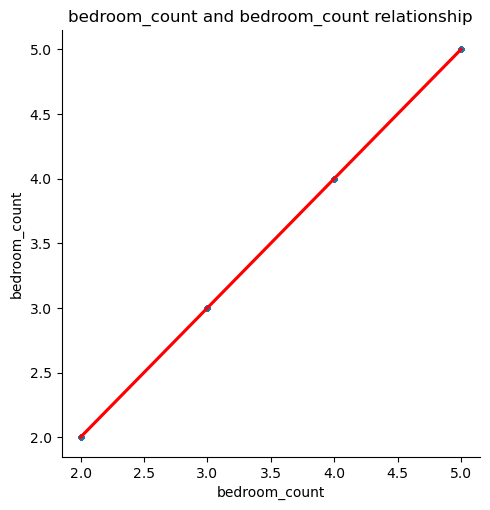

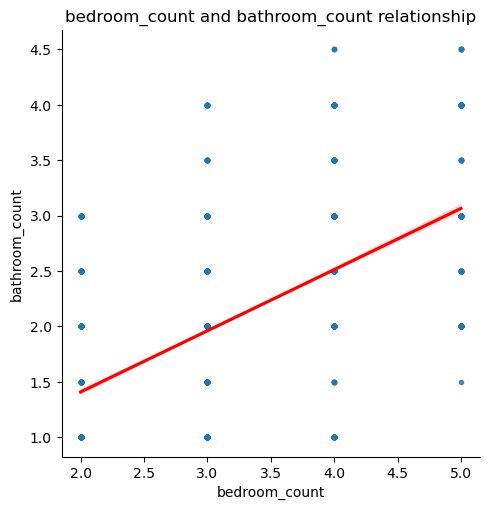

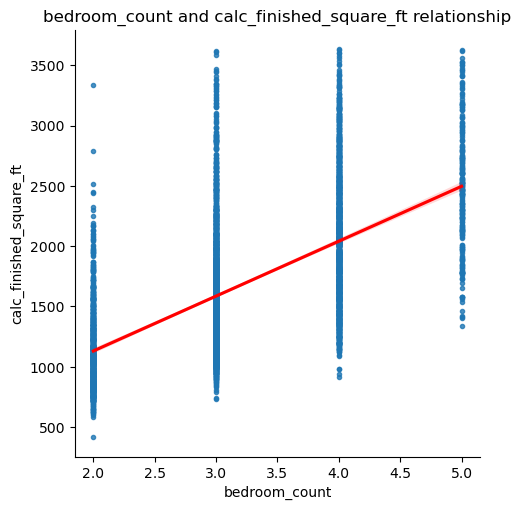

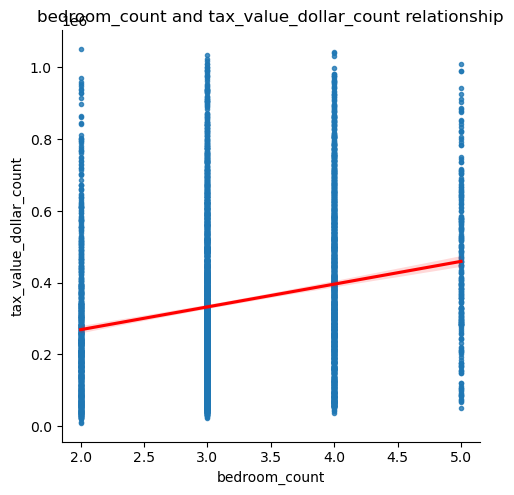

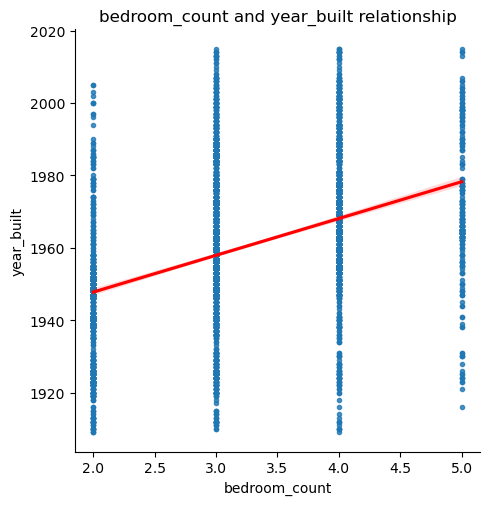

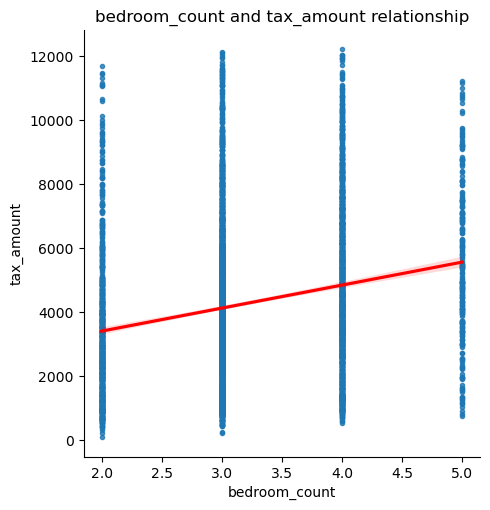

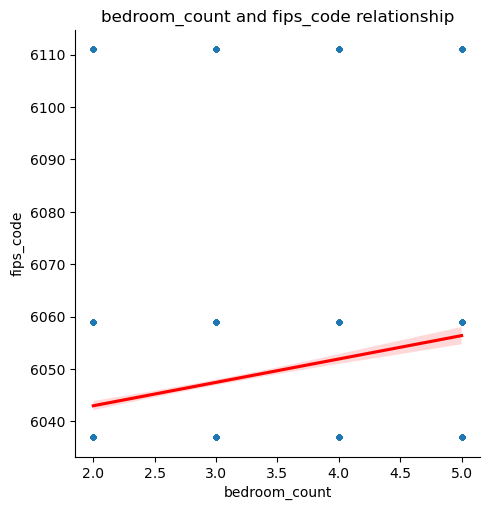

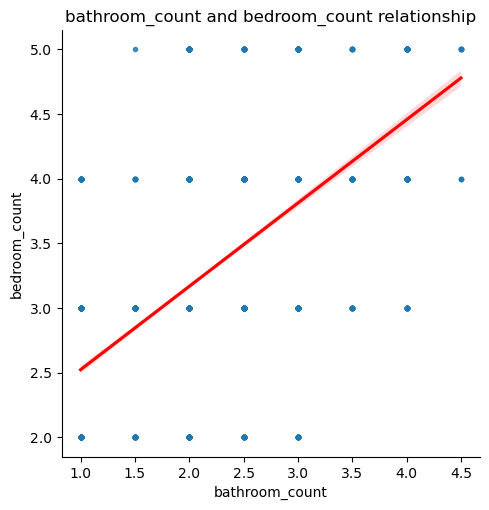

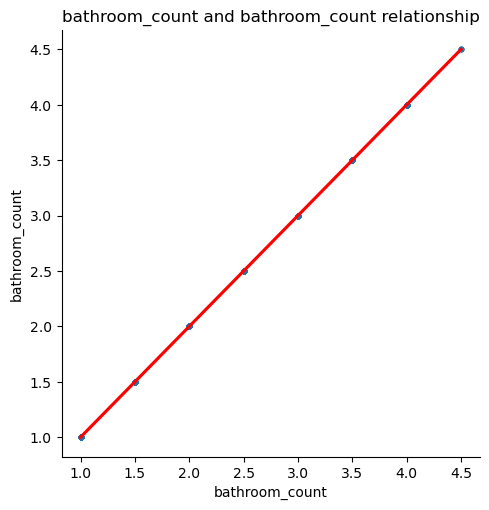

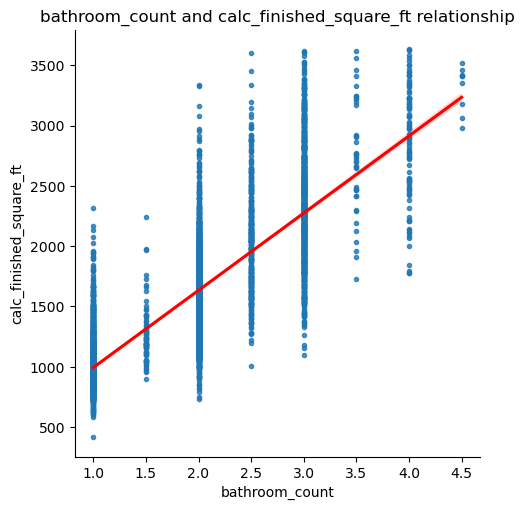

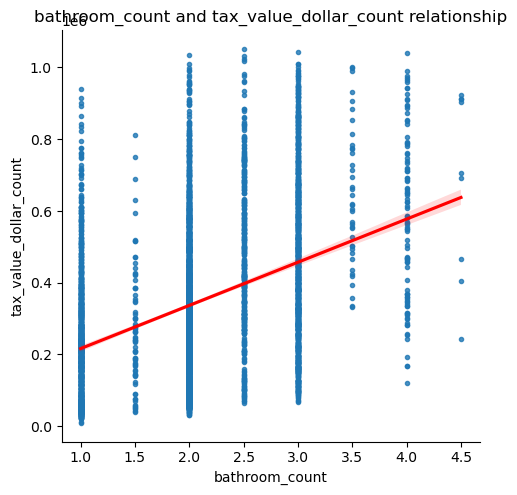

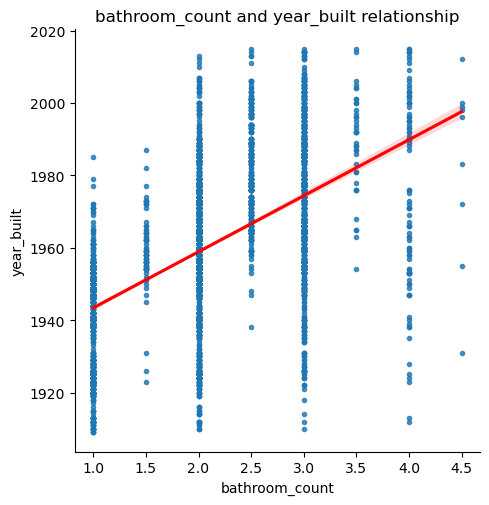

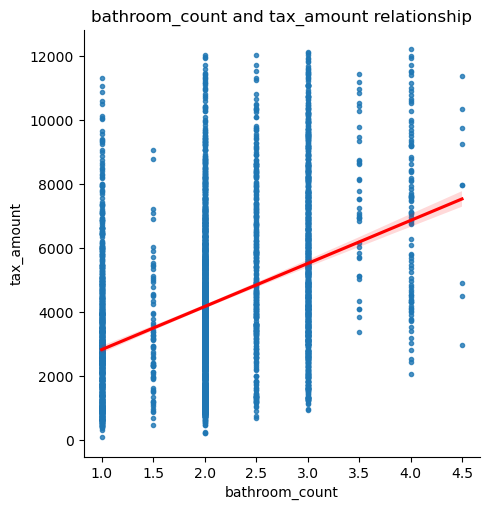

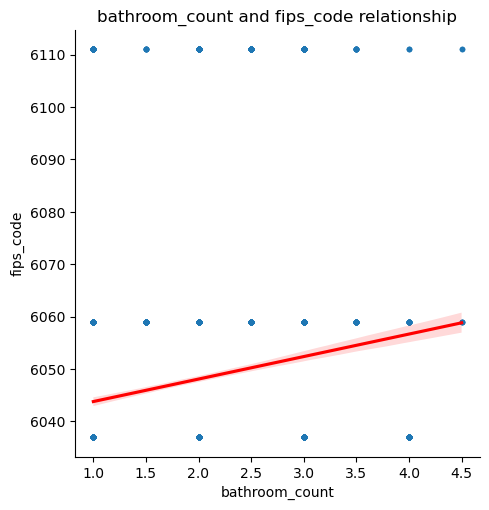

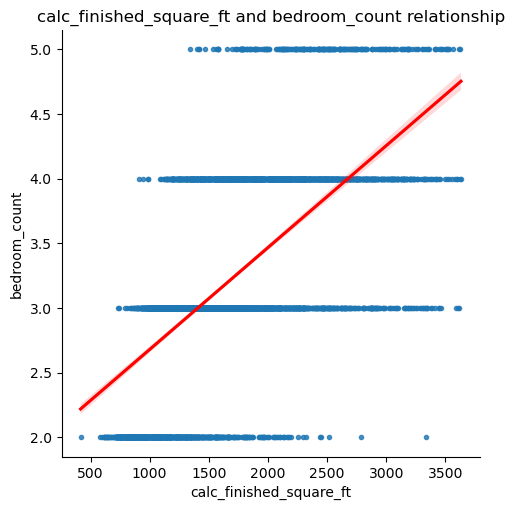

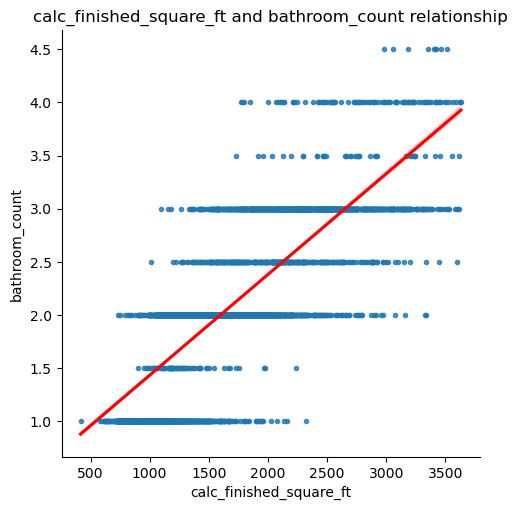

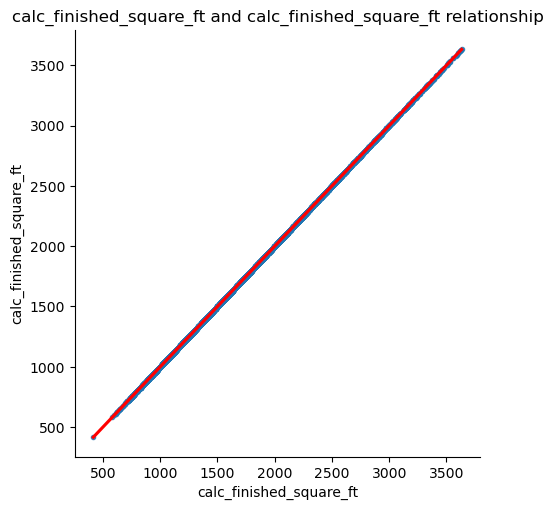

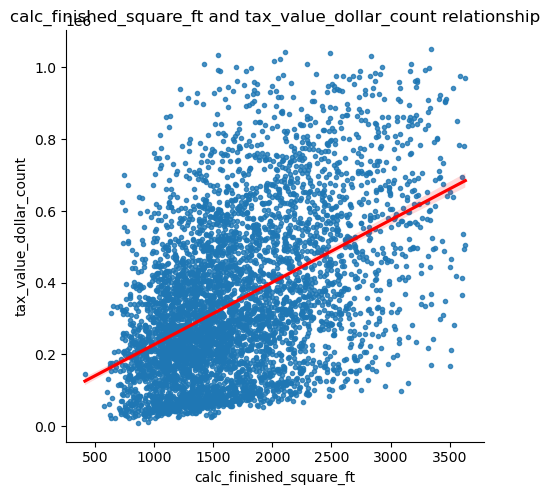

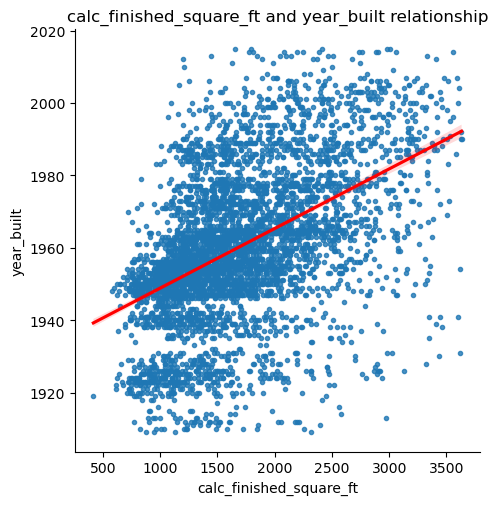

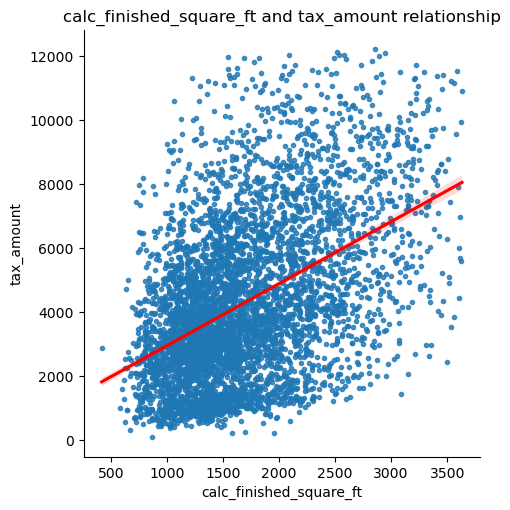

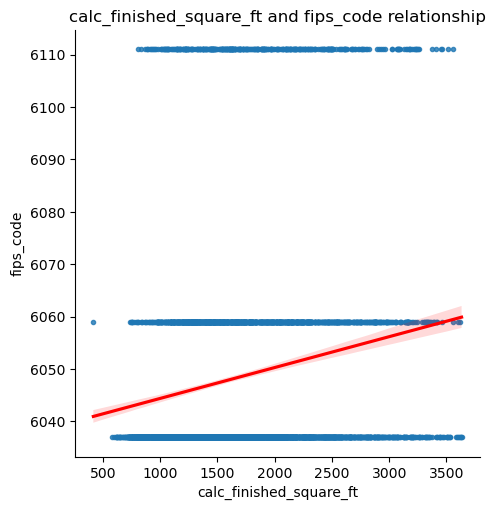

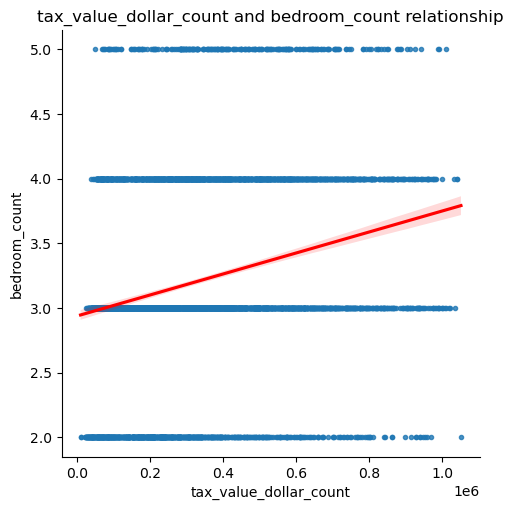

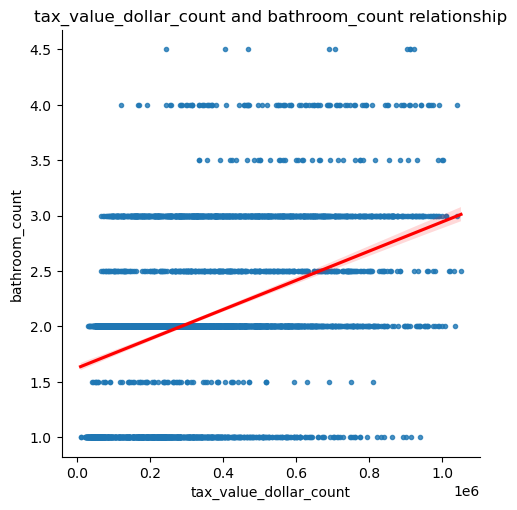

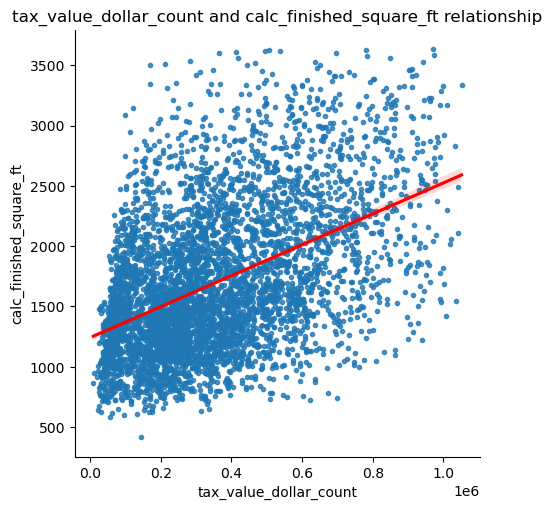

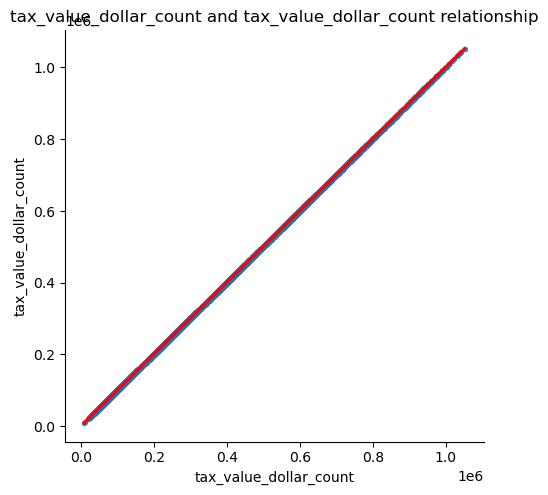

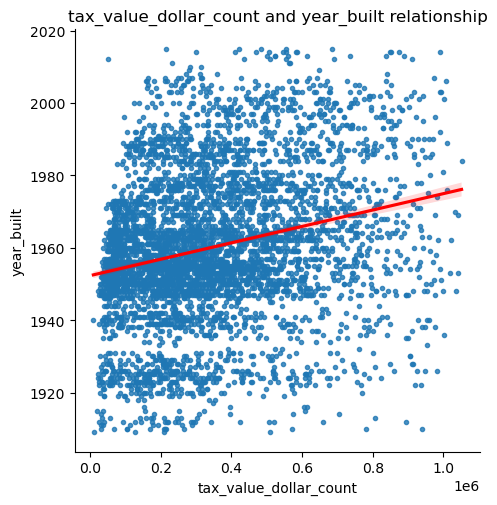

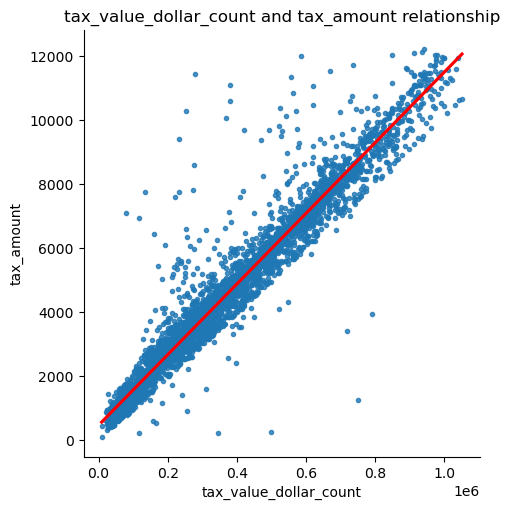

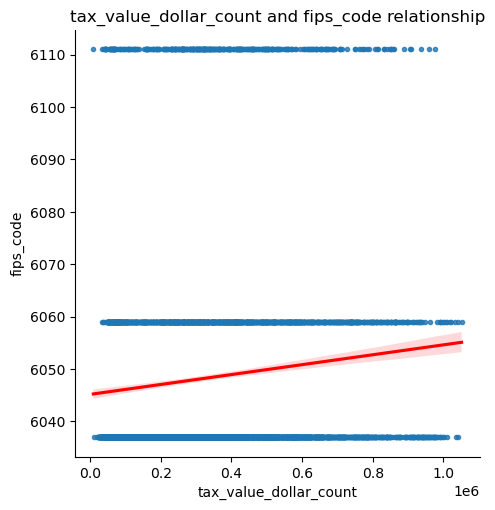

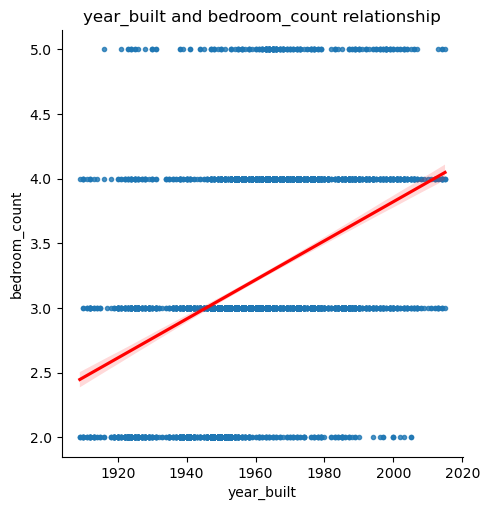

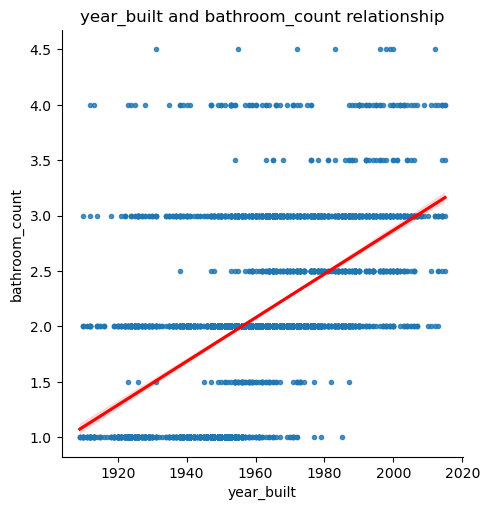

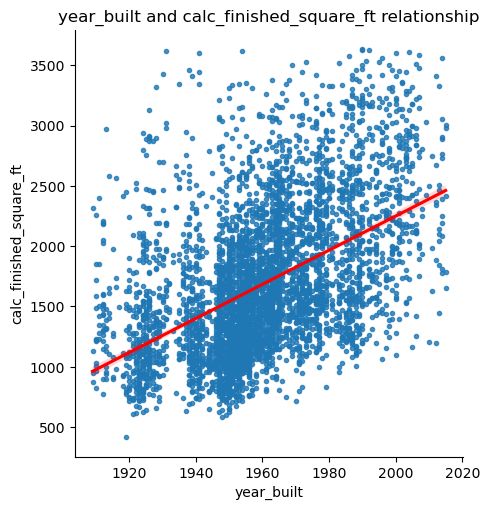

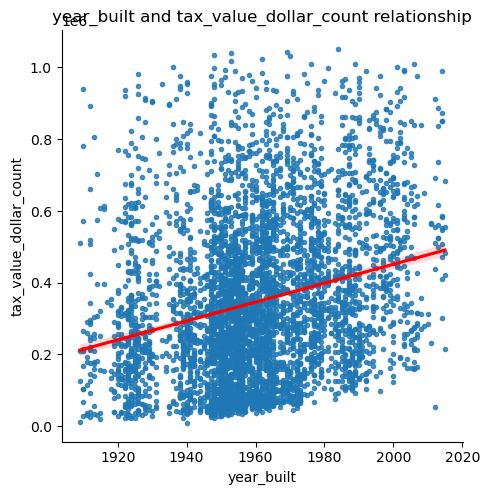

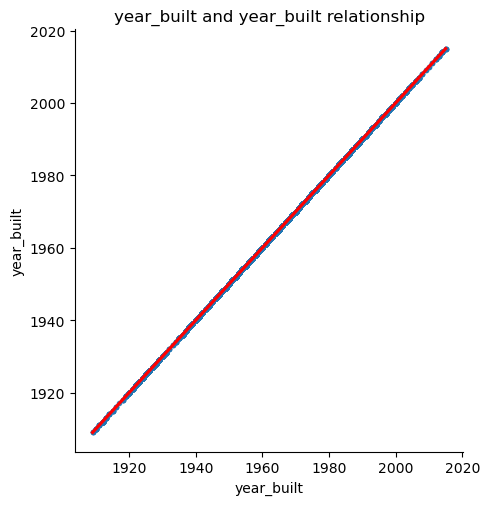

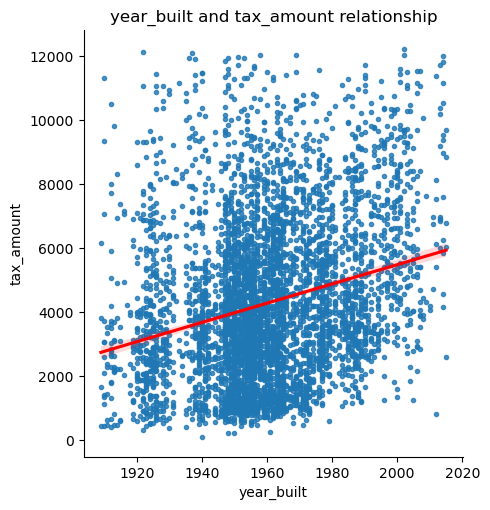

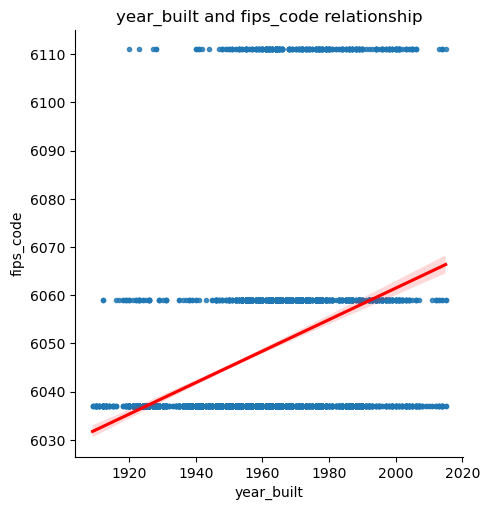

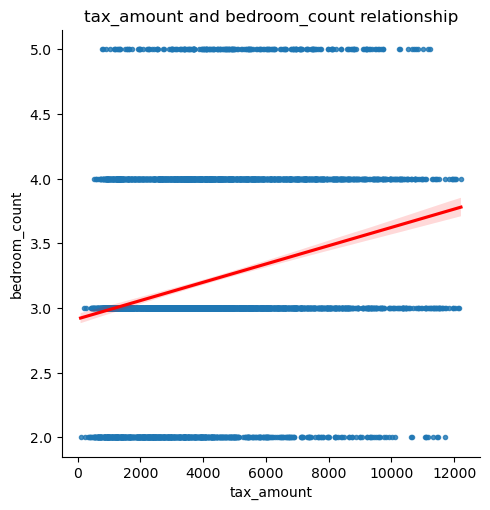

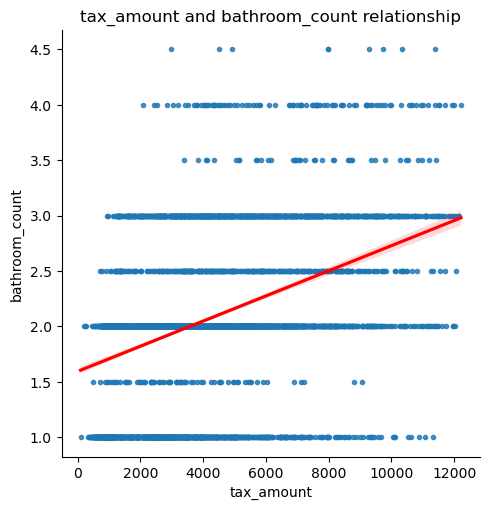

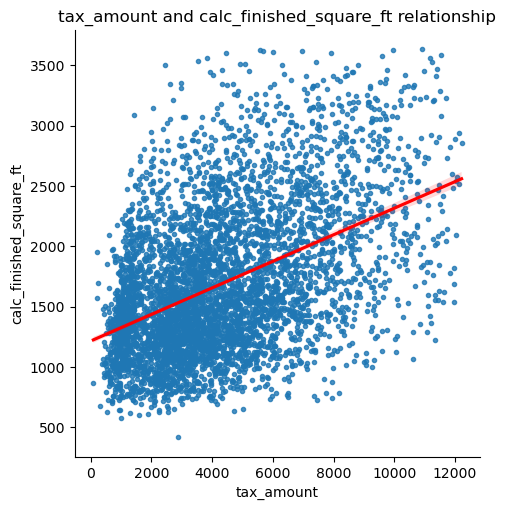

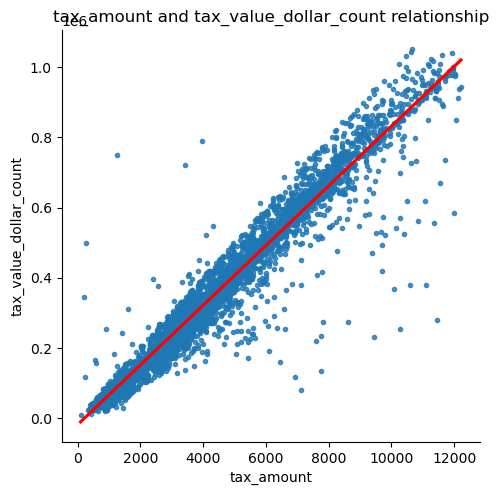

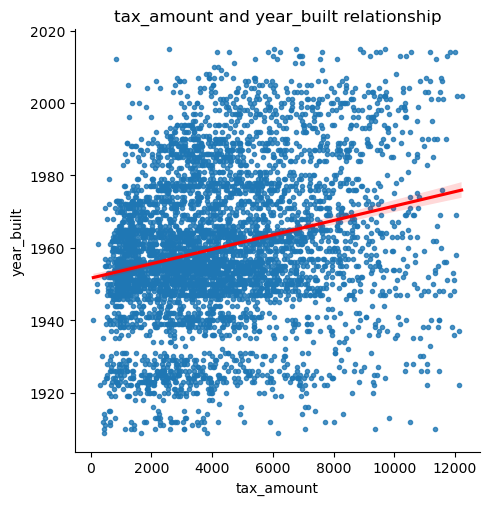

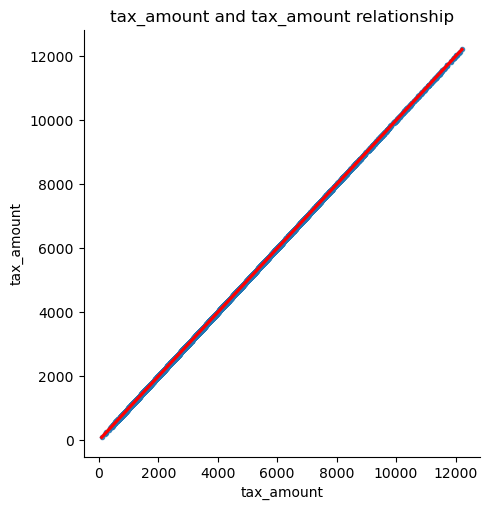

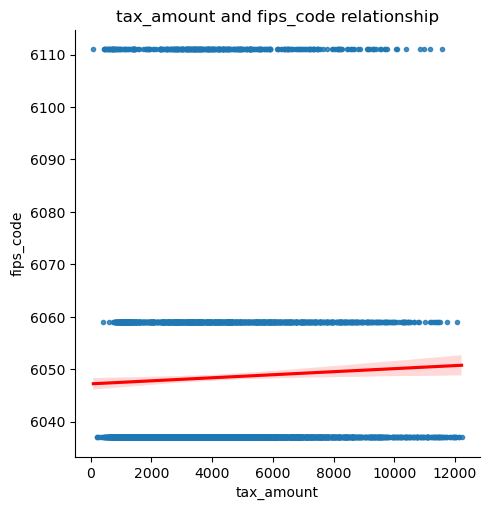

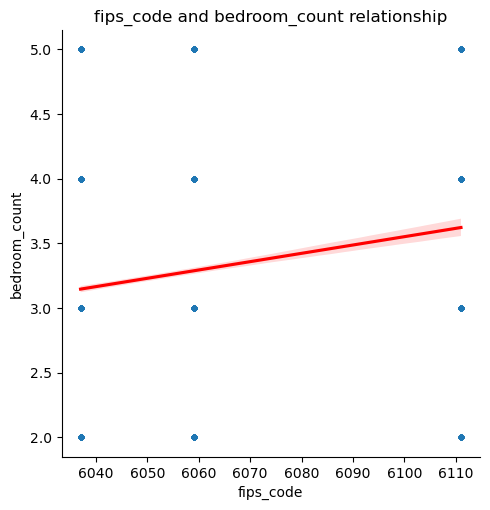

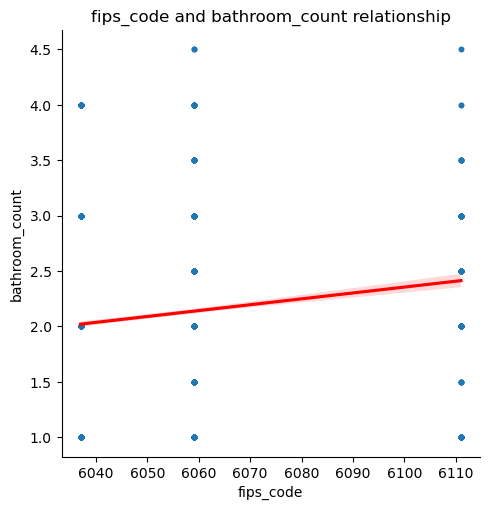

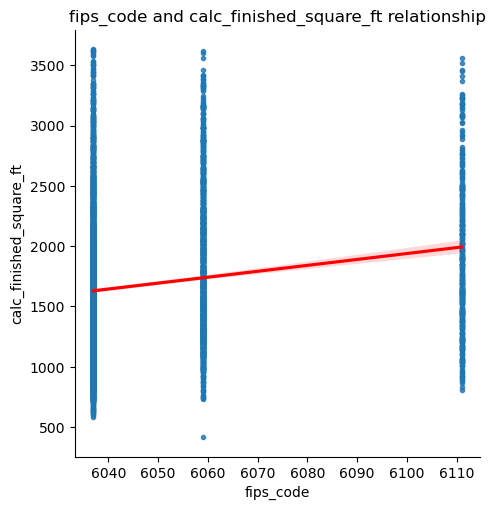

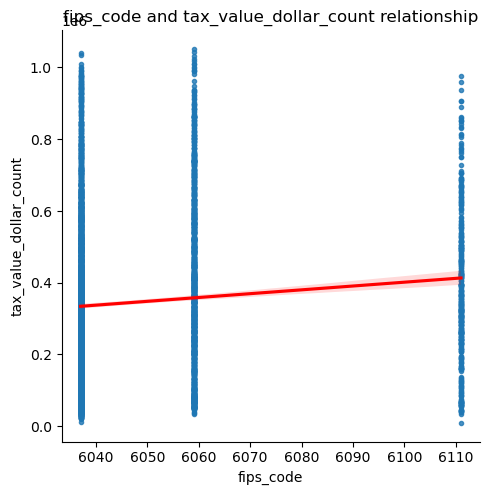

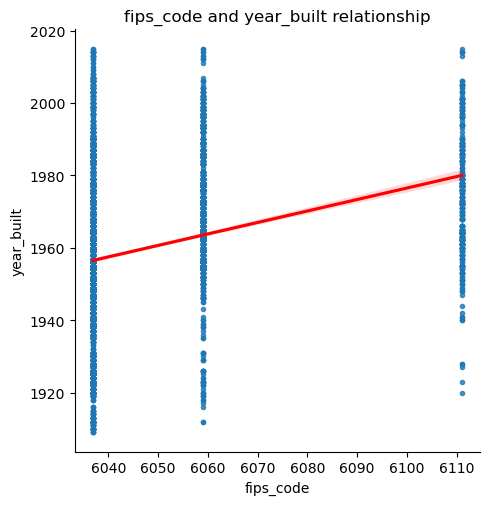

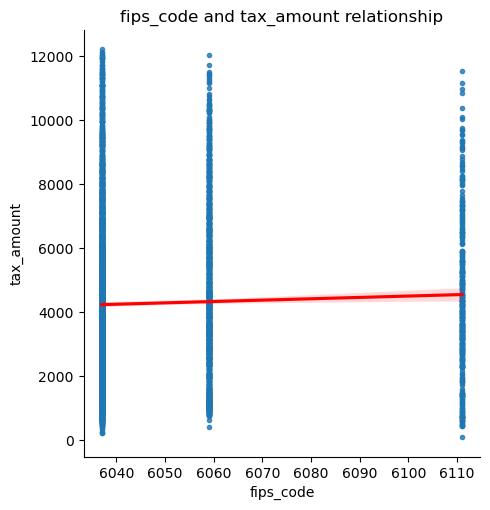

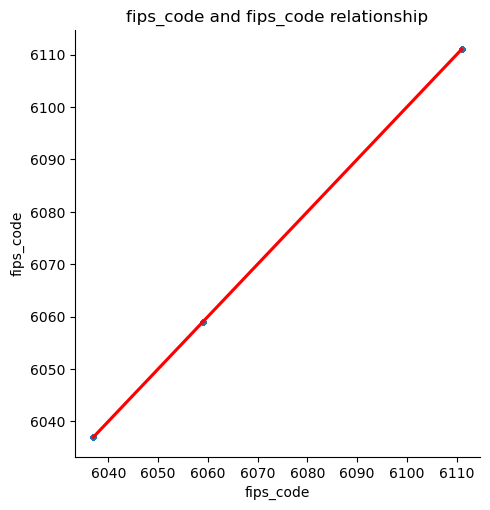

In [93]:
plot_variable_pairs(ztrain)

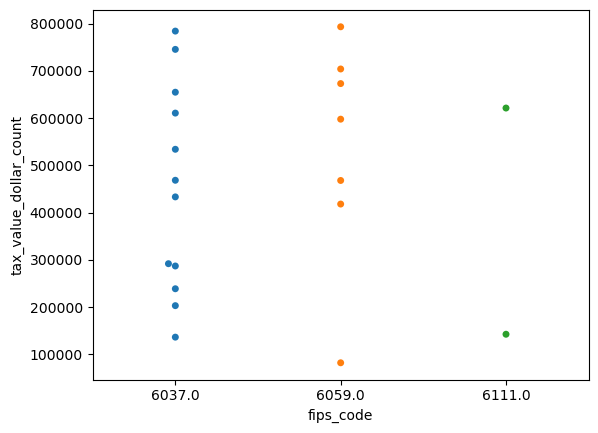

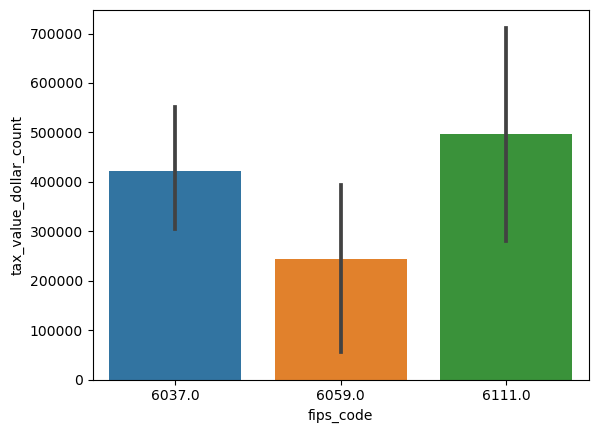

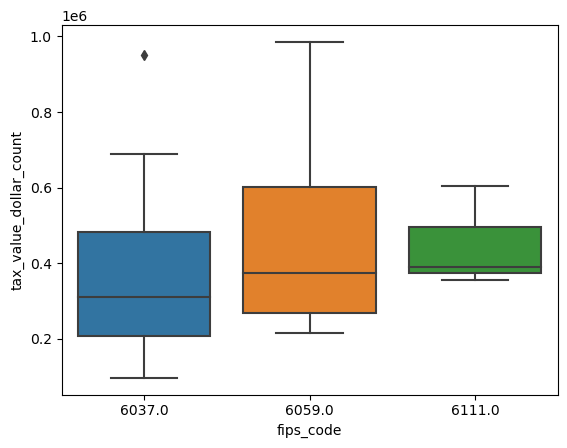

In [98]:
plot_categorical_and_continuous_vars(ztrain, ztrain['tax_value_dollar_count'], ztrain['fips_code'])

In [ ]:
#Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

# Come up with some initial hypotheses based on your goal of predicting property value.

My initial thoughts and hyoptheses is that houses with a overall finished square feet will be more expensive. Also, year built seems to have a positive correlation with several continuous features so I think there will be a higher average price the newer the house. Tax value will be unusable in modeling because of the weight the model will place on it compared to other features.

In [108]:
#Visualize all combinations of variables in some way.

#combinations of all variables have been done above.

In [ ]:
#Run the appropriate statistical tests where needed.



In [110]:
#What independent variables are correlated with the dependent variable, home value?

correlations= ztrain.corr(method='spearman')
correlations

bedroom_count  bathroom_count  \
bedroom_count                 1.000000        0.583035   
bathroom_count                0.583035        1.000000   
calc_finished_square_ft       0.609420        0.788528   
tax_value_dollar_count        0.209906        0.373871   
year_built                    0.415422        0.571447   
tax_amount                    0.210207        0.371698   
fips_code                     0.190284        0.203737   

                         calc_finished_square_ft  tax_value_dollar_count  \
bedroom_count                           0.609420                0.209906   
bathroom_count                          0.788528                0.373871   
calc_finished_square_ft                 1.000000                0.417088   
tax_value_dollar_count                  0.417088                1.000000   
year_built                              0.501538                0.248871   
tax_amount                              0.412444                0.973973   
fips_code                               0.200950                0.166085   

                         year_built  tax_amount  fips_code  
bedroom_count              0.415422    0.210207   0.190284  
bathroom_count             0.571447    0.371698   0.203737  
calc_finished_square_ft    0.501538    0.412444   0.200950  
tax_value_dollar_count     0.248871    0.973973   0.166085  
year_built                 1.000000    0.244596   0.415578  
tax_amount                 0.244596    1.000000   0.089914  
fips_code                  0.415578    0.089914   1.000000

In [119]:
valuedf=pd.DataFrame(data=correlations.iloc[3])
valuedf.sort_values(by= 'tax_value_dollar_count', ascending=False)

tax_value_dollar_count
tax_value_dollar_count                 1.000000
tax_amount                             0.973973
calc_finished_square_ft                0.417088
bathroom_count                         0.373871
year_built                             0.248871
bedroom_count                          0.209906
fips_code                              0.166085